# Sentiment Analysis

# 1) Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [4]:
# For Processing
import re
import nltk
import pandas as pd
import numpy as np
import gensim
import string
import math

In [5]:
# Other imports
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [6]:
# For sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

In [7]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve, GridSearchCV

# 2)- Loading datset

In [8]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('self_drive_clean_round1.csv', encoding= 'utf-8')
data.head()

,sentiment,text,cleaned
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...
1,5,I want a Google driverless car.,want google driverless car
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...


In [9]:
data.shape

(981, 3)

# 3) Creating sentiments

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\69785hsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sid= SentimentIntensityAnalyzer()

In [12]:
data['Sent_compound_Polarity'] = data.cleaned.apply(lambda x:sid.polarity_scores(x)['compound'])
data['Sent_type']=''

In [13]:
data.head()

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,0.5106,
1,5,I want a Google driverless car.,want google driverless car,0.0772,
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,0.6249,
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...,0.8360,
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,0.6249,


In [14]:
data.loc[data.Sent_compound_Polarity > 0, 'Sent_type']= 'Positive'

data.loc[data.Sent_compound_Polarity == 0, 'Sent_type']= 'Neutral'

data.loc[data.Sent_compound_Polarity < 0, 'Sent_type']= 'Negative'

In [15]:
data.head()

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,0.5106,Positive
1,5,I want a Google driverless car.,want google driverless car,0.0772,Positive
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,0.6249,Positive
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...,0.8360,Positive
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,0.6249,Positive


In [16]:
tweets_sentiment=data.Sent_type.value_counts()
tweets_sentiment

Positive    392
Neutral     390
Negative    199
Name: Sent_type, dtype: int64

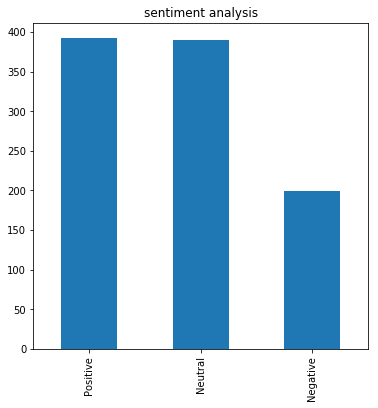

In [17]:
data.Sent_type.value_counts().plot (kind='bar' , title="sentiment analysis")

In [18]:
# extracting the number of sentiments of each class
Pos_len = data[data['Sent_type'] == 'Positive'].shape[0]
Neut_len = data[data['Sent_type'] == 'Neutral'].shape[0]
Neg_len = data[data['Sent_type'] == 'Negative'].shape[0]

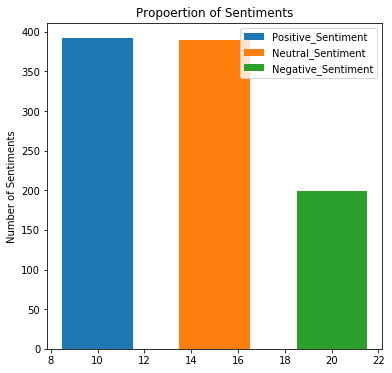

In [19]:
# bar plot of the 3 classes
plt.bar(10,Pos_len,3, label="Positive_Sentiment")
plt.bar(15,Neut_len,3, label="Neutral_Sentiment")
plt.bar(20,Neg_len,3, label="Negative_Sentiment")
plt.legend()
plt.ylabel('Number of Sentiments')
plt.title('Propoertion of Sentiments')
plt.show()

### saving as csv file

In [20]:
data.to_csv('cleaned_sentiment_self_cars.csv', index= False, encoding= 'utf-8')

In [21]:
data_sentiment = pd.read_csv('cleaned_sentiment_self_cars.csv', encoding= 'utf-8')

In [22]:
data_sentiment.head()

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,0.5106,Positive
1,5,I want a Google driverless car.,want google driverless car,0.0772,Positive
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,0.6249,Positive
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...,0.8360,Positive
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,0.6249,Positive


# 4) Visualize most emphatic words of tweets

In [23]:
sentiment_pos = data[ data['Sent_type'] == 'Positive']
sentiment_pos.head()

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,0.5106,Positive
1,5,I want a Google driverless car.,want google driverless car,0.0772,Positive
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,0.6249,Positive
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...,0.8360,Positive
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,0.6249,Positive


In [24]:
sentiment_pos = sentiment_pos['cleaned']
sentiment_pos.head()

0    manjulamartin kirk gleason except train capita...
1                           want google driverless car
2    oatmeal google driverless teslamotors ooooh wo...
3    much awesome amazing video google next phase d...
4    google making driverless car awesome http co h...
Name: cleaned, dtype: object

In [25]:
sentimet_neg = data[ data['Sent_type'] == 'Negative']
sentimet_neg =sentimet_neg['cleaned']
sentimet_neg[:5]

17                              want driverless car bad
19    skynet sherijo driverless car sick accident in...
30    google survey asked use driverless car wished ...
35    burkhard bilger inside google driverless car h...
47    jealous reuters ingrassiareuter get ride googl...
Name: cleaned, dtype: object

In [26]:
sentimet_neutral = data[ data['Sent_type'] == 'Neutral']
sentimet_neutral =sentimet_neutral['cleaned']
sentimet_neutral[:5]

5      could call driverless car tell car take whoo hoo
6     marketplace google driverless car take one htt...
11    future oh place go http co ypmuee mdw wait dri...
13                 need driverless car http co uuz bmhb
14        google developed driverless car fucking chill
Name: cleaned, dtype: object

In [27]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()

Positive words


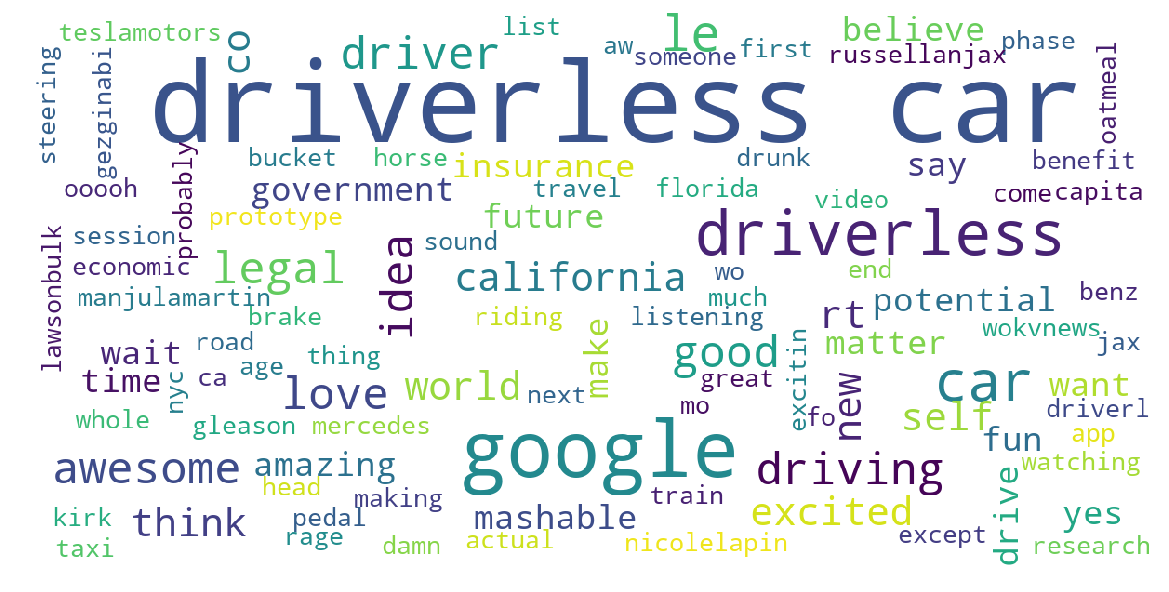

In [28]:
print("Positive words")
Mywordcloud(sentiment_pos)

Negative words


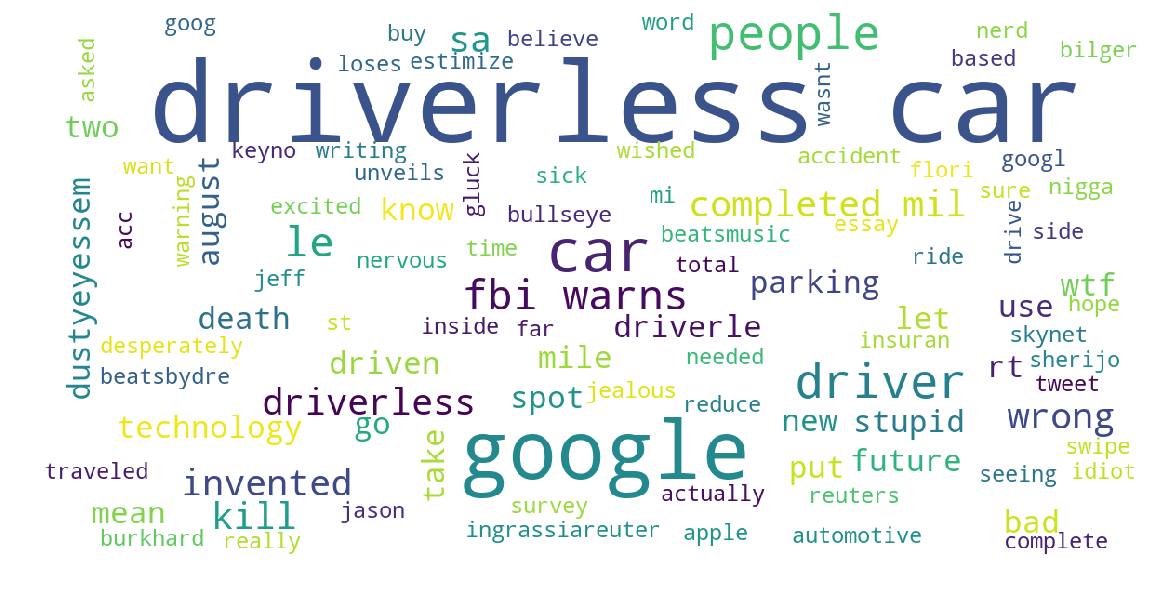

In [29]:
print("Negative words")
Mywordcloud(sentimet_neg)

Neutral words


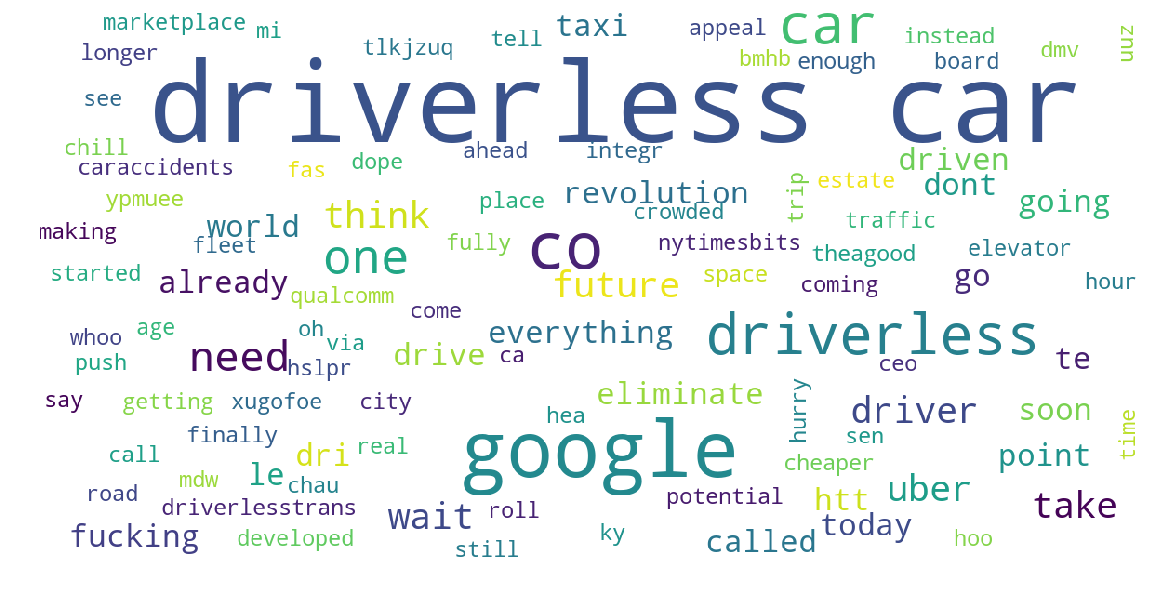

In [30]:
print("Neutral words")
Mywordcloud(sentimet_neutral)

# 5) Histogram of text length of each sentiment

In [31]:
data_sentiment = pd.read_csv('cleaned_sentiment_self_cars.csv', encoding= 'utf-8')
data_sentiment.columns

Index(['sentiment', 'text', 'cleaned', 'Sent_compound_Polarity', 'Sent_type'], dtype='object')

In [32]:
#A function to return the length of text
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [33]:
#Apply the function to each sentiment part
data_sentiment['length'] = data_sentiment['cleaned'].apply(length)
data_sentiment.head(10)

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type,length
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,0.5106,Positive,100
1,5,I want a Google driverless car.,want google driverless car,0.0772,Positive,26
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,0.6249,Positive,57
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...,0.8360,Positive,90
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,0.6249,Positive,52
5,5,You could call a driverless car and tell the c...,could call driverless car tell car take whoo hoo,0.0000,Neutral,48
6,5,"Ì¢‰âÂÒ@Marketplace: Google's driverless cars,...",marketplace google driverless car take one htt...,0.0000,Neutral,88
7,5,Driverless taxis in NYC would probably be an a...,driverless taxi nyc would probably amazing app...,0.5859,Positive,72
8,5,This whole @google driverless car prototype th...,whole google driverless car prototype thing aw...,0.6249,Positive,89
9,5,Google's New Driverless Car Has No Brake Pedal...,google new driverless car brake pedal steering...,0.5574,Positive,98


**just to check what is length of unclean data**

In [34]:
data_sentiment['ln_uncln'] = data_sentiment['text'].apply(length)
data_sentiment.head(10)

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type,length,ln_uncln
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,0.5106,Positive,100,140
1,5,I want a Google driverless car.,want google driverless car,0.0772,Positive,26,31
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,0.6249,Positive,57,72
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...,0.8360,Positive,90,116
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,0.6249,Positive,52,73
5,5,You could call a driverless car and tell the c...,could call driverless car tell car take whoo hoo,0.0000,Neutral,48,84
6,5,"Ì¢‰âÂÒ@Marketplace: Google's driverless cars,...",marketplace google driverless car take one htt...,0.0000,Neutral,88,131
7,5,Driverless taxis in NYC would probably be an a...,driverless taxi nyc would probably amazing app...,0.5859,Positive,72,89
8,5,This whole @google driverless car prototype th...,whole google driverless car prototype thing aw...,0.6249,Positive,89,107
9,5,Google's New Driverless Car Has No Brake Pedal...,google new driverless car brake pedal steering...,0.5574,Positive,98,129


In [35]:
#Extracting data of each class
sent_pos = data_sentiment[data_sentiment['Sent_type'] == 'Positive']
sent_neut = data_sentiment[data_sentiment['Sent_type'] == 'Neutral']
sent_neg = data_sentiment[data_sentiment['Sent_type'] == 'Negative']

In [36]:
len(sent_pos)

392

In [37]:
len(sent_neut)

390

In [38]:
len(sent_neg)

199

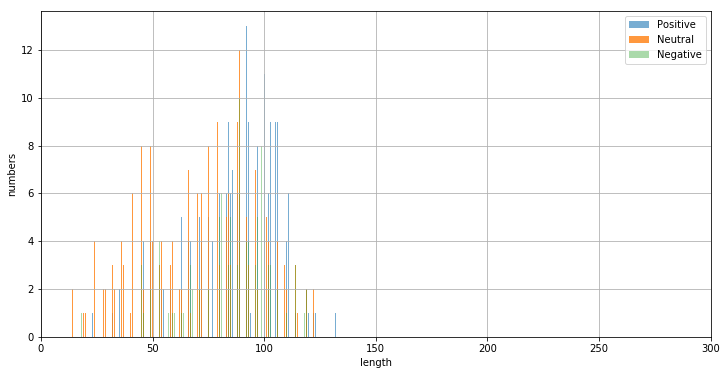

In [39]:
#Histogram of text lenght of each writer
#As we can see the distributions coincides so it better to leave out text length as a feature for predictive modelling
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(sent_pos['length'], alpha = 0.6, bins=bins, label='Positive')
plt.hist(sent_neut['length'], alpha = 0.8, bins=bins, label='Neutral')
plt.hist(sent_neg['length'], alpha = 0.4, bins=bins, label='Negative')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

# 6) Top words of each sentiment and their count

### 6-a)Positive

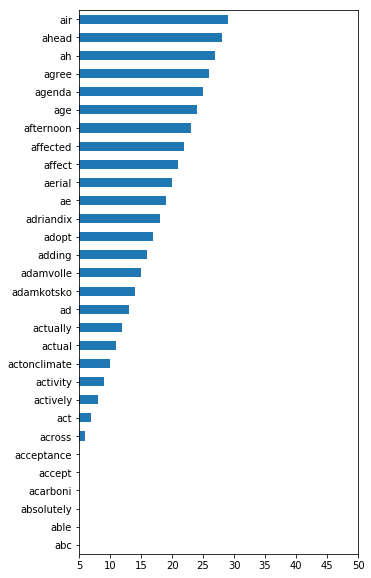

In [40]:
# create the object of tfid vectorizer
pos_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
pos_tfid_vectorizer.fit(sent_pos['cleaned'])
# collect the vocabulary items used in the vectorizer
pos_dictionary = pos_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in pos_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
pos_vocab = pd.Series(count, index=vocab)
# sort the dataframe
pos_vocab = pos_vocab.sort_values(axis=0, ascending=True, kind= 'quicksort')
# plot of the top vocab
top_vacab = pos_vocab.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (5, 50))

### 6-b) Negative

In [41]:
sent_neg.head(50)

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type,length,ln_uncln
17,5,I want a driverless car so bad.,want driverless car bad,-0.4939,Negative,23,31
19,5,#SKYNET Ì¢‰âÂÒ@SheriJo: I am for driverless c...,skynet sherijo driverless car sick accident in...,-0.9360,Negative,97,152
30,5,#Google Survey just asked if I'd use a #driver...,google survey asked use driverless car wished ...,-0.4404,Negative,91,137
35,5,Burkhard Bilger: Inside GoogleÌ¢‰âÂ‰ã¢s Driver...,burkhard bilger inside google driverless car h...,-0.4215,Negative,93,121
47,5,Jealous! @Reuters own @IngrassiaReuter gets to...,jealous reuters ingrassiareuter get ride googl...,-0.1280,Negative,99,134
53,5,Automotive technology: Driver-less cars will r...,automotive technology driver le car reduce acc...,-0.1531,Negative,67,79
60,4,Google's driverless car - desperately needed i...,google driverless car desperately needed flori...,-0.3818,Negative,56,66
62,4,So...did #apple buy @beatsmusic and @beatsbydr...,apple buy beatsmusic beatsbydre wasnt sure new...,-0.2411,Negative,89,136
65,4,I'm over here writing a 2000 word essay while ...,writing word essay nigga google driverless car...,-0.7430,Negative,79,130
67,4,Actually I believe that less people will be ne...,actually believe le people nervous seeing goog...,-0.2732,Negative,92,140


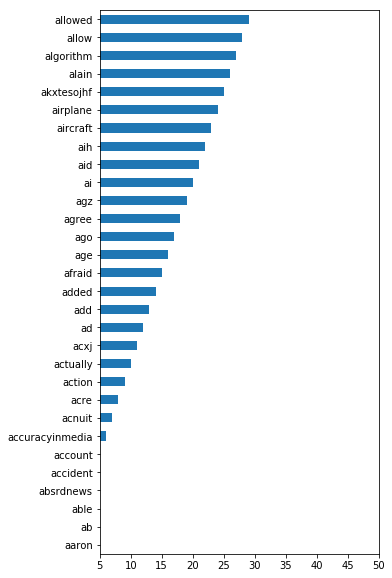

In [42]:
# create the object of tfid vectorizer
neg_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
neg_tfid_vectorizer.fit(sent_neg['cleaned'])
# collect the vocabulary items used in the vectorizer
neg_dictionary = neg_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in neg_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
neg_vocab = pd.Series(count, index=vocab)
# sort the dataframe
neg_vocab = neg_vocab.sort_values(axis=0, ascending=True, kind= 'quicksort')
# plot of the top vocab
top_vacab = neg_vocab.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (5, 50))

### 6-c) Neutral

In [43]:
sent_neut.head(50)

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type,length,ln_uncln
5,5,You could call a driverless car and tell the c...,could call driverless car tell car take whoo hoo,0.0,Neutral,48,84
6,5,"Ì¢‰âÂÒ@Marketplace: Google's driverless cars,...",marketplace google driverless car take one htt...,0.0,Neutral,88,131
11,5,This is the future and it is now!! OH the plac...,future oh place go http co ypmuee mdw wait dri...,0.0,Neutral,65,129
13,5,This is why we need driverless cars. http://t....,need driverless car http co uuz bmhb,0.0,Neutral,36,57
14,5,Google developed a driverless car. Now that's ...,google developed driverless car fucking chill,0.0,Neutral,45,60
16,5,They're coming out with driverless cars.... I'...,coming driverless car,0.0,Neutral,21,50
20,5,Driverless cars will eliminate 80% of traffic ...,driverless car eliminate traffic crowded city ...,0.0,Neutral,72,97
27,5,13 hour drive ahead of me... @Google driverles...,hour drive ahead google driverless car get fas...,0.0,Neutral,54,79
32,5,Driverless car appeals to me instead of the re...,driverless car appeal instead real estate chau...,0.0,Neutral,100,127
43,5,A driverless car?? I need to get me one of the...,driverless car need get one http co tlkjzuq,0.0,Neutral,43,71


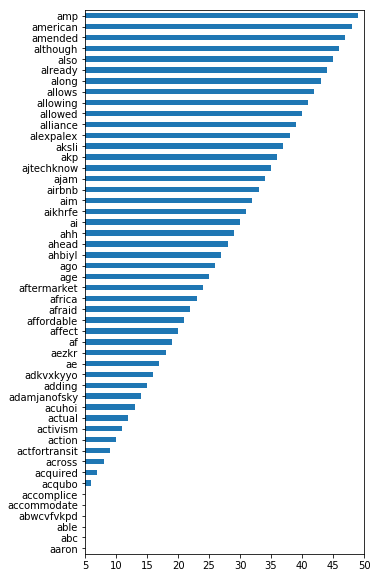

In [44]:
# create the object of tfid vectorizer
neut_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
neut_tfid_vectorizer.fit(sent_neut['cleaned'])
# collect the vocabulary items used in the vectorizer
neut_dictionary = neut_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in neut_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
neut_vocab = pd.Series(count, index=vocab)
# sort the dataframe
neut_vocab = neut_vocab.sort_values(axis=0, ascending=True, kind= 'quicksort')
# plot of the top vocab
top_vacab = neut_vocab.head(50)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (5, 50))

**As we can see the top words of each sentiment are cleary distinct and are in huge numbers. Word Count or TF-IDF of the can provide a good feature.**

# 7) TF-IDF

tf-idf weight is product of two terms: the first term is the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

### 7.1 Fitting tf-idf
If we have test data then we will not fit on test dataset. Fitting means our machine is learning and knowing set of words in our corpus/dictionary. Only train data will go from 'fit' process

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(data_sentiment['cleaned'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items() 

### 7.2 Convert to document term matrix

In [46]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(data_sentiment['cleaned'])

### 7.3) making dense array

In [47]:
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

### 7.4) store the tf-idf array into pandas dataframe


In [48]:
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,3748,3749,3750,3751,3752,3753,3754,3755,3756,3757
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Now our dense-matrix is ready for modeling.**